In [4]:
import pandas as pd

data = pd.read_csv("population_zurich.csv")

In [5]:
data.head

<bound method NDFrame.head of         StichtagDatJahr  StichtagDatMM StichtagDatMonat StichtagDat  SexCd  \
0                  1998              1           Januar  1998-01-31      1   
1                  1998              1           Januar  1998-01-31      1   
2                  1998              1           Januar  1998-01-31      1   
3                  1998              1           Januar  1998-01-31      1   
4                  1998              1           Januar  1998-01-31      1   
...                 ...            ...              ...         ...    ...   
217565             2024              8           August  2024-08-31      2   
217566             2024              8           August  2024-08-31      2   
217567             2024              8           August  2024-08-31      2   
217568             2024              8           August  2024-08-31      2   
217569             2024              8           August  2024-08-31      2   

         SexLang  AlterV20ueber80

In [6]:
data.columns

Index(['StichtagDatJahr', 'StichtagDatMM', 'StichtagDatMonat', 'StichtagDat',
       'SexCd', 'SexLang', 'AlterV20ueber80Sort_noDM',
       'AlterV20ueber80Cd_noDM', 'AlterV20ueber80Kurz_noDM', 'HerkunftCd',
       'HerkunftLang', 'KreisCd', 'KreisLang', 'QuarCd', 'QuarLang',
       'DatenstandCd', 'DatenstandLang', 'AnzBestWir'],
      dtype='object')

In [7]:
data.iloc[0, :]

StichtagDatJahr                       1998
StichtagDatMM                            1
StichtagDatMonat                    Januar
StichtagDat                     1998-01-31
SexCd                                    1
SexLang                           männlich
AlterV20ueber80Sort_noDM                 1
AlterV20ueber80Cd_noDM                   1
AlterV20ueber80Kurz_noDM              0-19
HerkunftCd                               1
HerkunftLang                  Schweizer*in
KreisCd                                  1
KreisLang                          Kreis 1
QuarCd                                  11
QuarLang                           Rathaus
DatenstandCd                             V
DatenstandLang              Veröffentlicht
AnzBestWir                             114
Name: 0, dtype: object

In [10]:
print(data['KreisLang'].unique(), len(data['KreisLang'].unique())) #we have 13 different Kreises

['Kreis 1' 'Kreis 2' 'Kreis 3' 'Kreis 4' 'Kreis 5' 'Kreis 6' 'Kreis 7'
 'Kreis 8' 'Kreis 9' 'Kreis 10' 'Kreis 11' 'Kreis 12' 'Unbekannt'] 13


In [9]:
print(data['QuarLang'].unique(), len(data['QuarLang'].unique())) #we have 35 different neighborhoods/quartieers

['Rathaus' 'Hochschulen' 'Lindenhof' 'City' 'Wollishofen' 'Leimbach'
 'Enge' 'Alt-Wiedikon' 'Friesenberg' 'Sihlfeld' 'Werd' 'Langstrasse'
 'Hard' 'Gewerbeschule' 'Escher Wyss' 'Unterstrass' 'Oberstrass'
 'Fluntern' 'Hottingen' 'Hirslanden' 'Witikon' 'Seefeld' 'Mühlebach'
 'Weinegg' 'Albisrieden' 'Altstetten' 'Höngg' 'Wipkingen' 'Affoltern'
 'Oerlikon' 'Seebach' 'Saatlen' 'Schwamendingen-Mitte' 'Hirzenbach'
 'Unbekannt'] 35


In [20]:
print(len(data['StichtagDat'].unique())) #we have 320 different days measurements

320


In [21]:
print(len(data['AlterV20ueber80Kurz_noDM'].unique())) #we have 5 different age ranges

5


## Plot of Zurich Total Population from 1998 to 2024

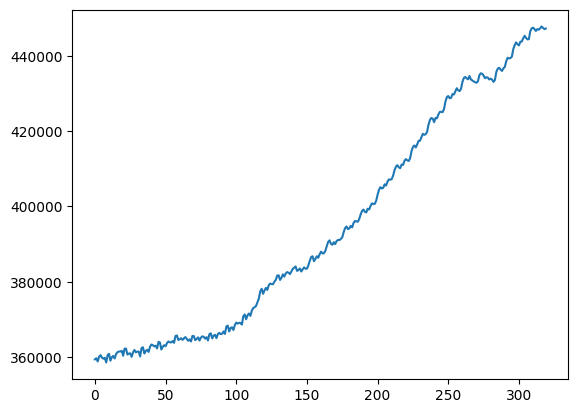

In [26]:
from pop_utils import get_city_population
import matplotlib.pyplot as plt

city_populations = []

for day in data['StichtagDat'].unique().tolist():

    city_populations.append(get_city_population(data, day))

plt.plot(city_populations)


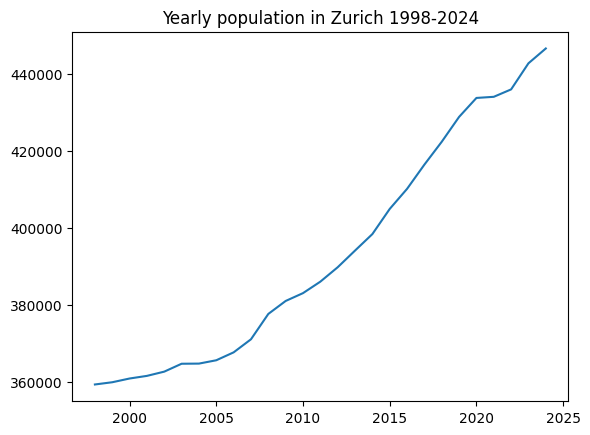

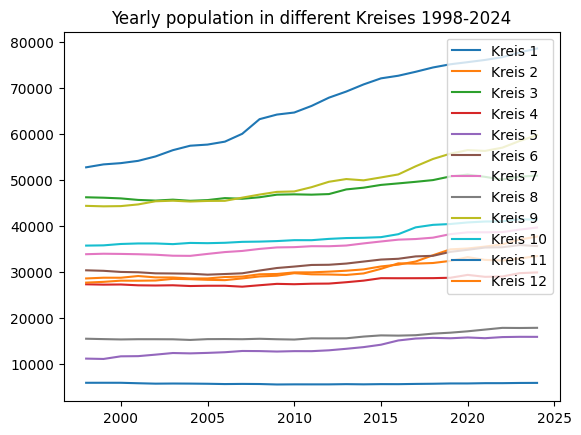

In [61]:
import numpy as np
from pop_utils import get_kreis_population

years = np.arange(1998, 2025)
kreis_labels = data['KreisLang'].unique().tolist()
yearly_city_populations = []
yearly_kreises_populations = [[] for _ in range(len(kreis_labels)-1)]

for year in years:

    day = f'{year}-01-31' #we take the first day of the year
    yearly_city_populations.append(get_city_population(data, day))

    for i in range(len(kreis_labels)-1):
        yearly_kreises_populations[i].append(get_kreis_population(data, day, i+1))

plt.figure()
plt.plot(years, yearly_city_populations)
plt.title("Yearly population in Zurich 1998-2024")
plt.show()

plt.figure()
for i in range(len(kreis_labels)-1):
    plt.plot(years, yearly_kreises_populations[i], label = f"{kreis_labels[i]}")
plt.legend()
plt.title("Yearly population in different Kreises 1998-2024")
plt.show()


## Pie Charts of Distribution of Population over Different Kreises over the years

[5895, 28585, 46237, 27315, 11153, 30355, 33859, 15478, 44373, 35730, 52752, 27679]


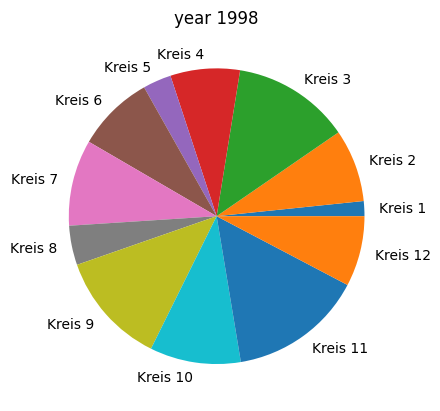

[5899, 28745, 46147, 27241, 11076, 30247, 33960, 15393, 44268, 35781, 53388, 27844]


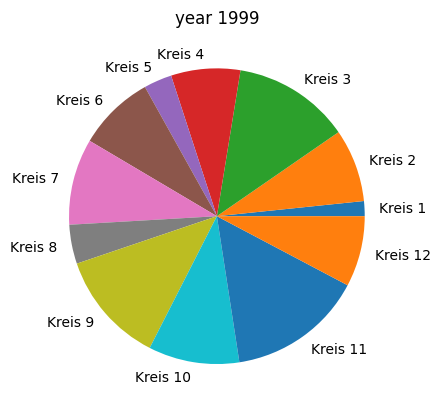

[5896, 28741, 45993, 27272, 11650, 30002, 33919, 15320, 44318, 36082, 53663, 28104]


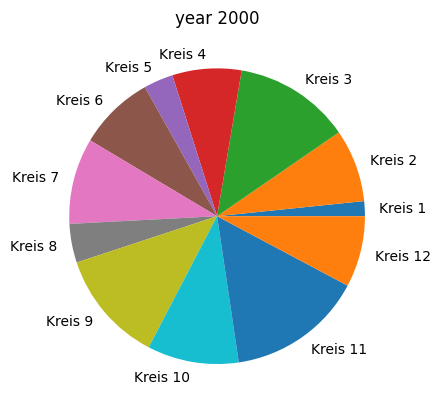

[5795, 29112, 45662, 27092, 11689, 29930, 33852, 15373, 44686, 36196, 54160, 28094]


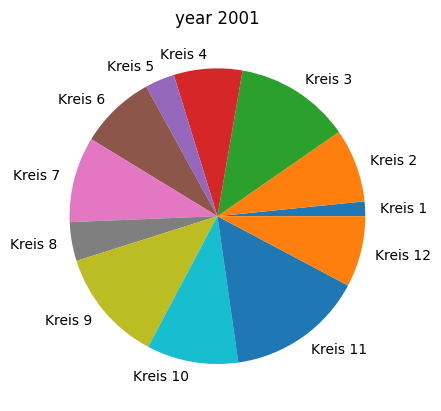

[5706, 28818, 45520, 27051, 12016, 29698, 33744, 15370, 45370, 36197, 55119, 28135]


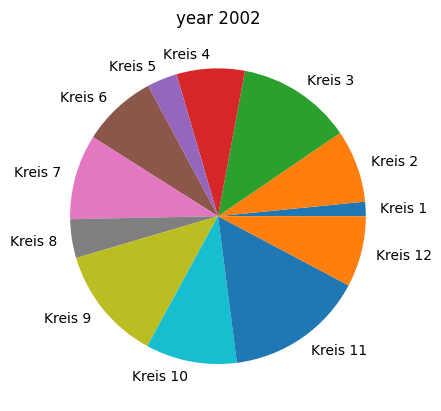

[5734, 28796, 45723, 27101, 12369, 29666, 33529, 15353, 45493, 36050, 56481, 28496]


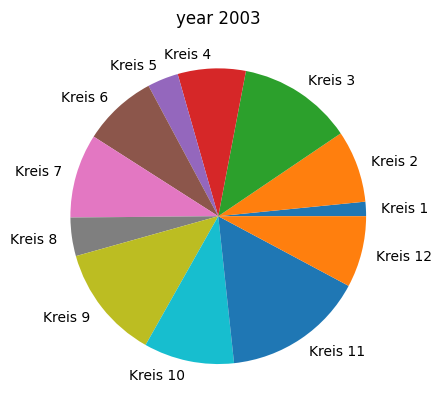

[5717, 28585, 45474, 26937, 12291, 29611, 33498, 15214, 45316, 36310, 57451, 28424]


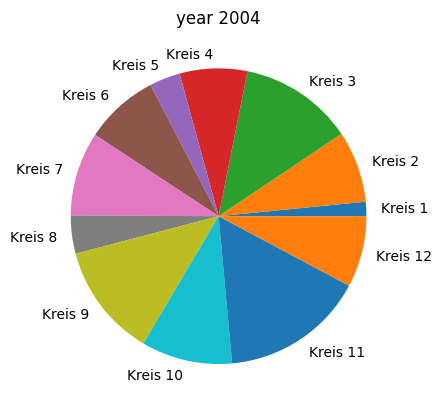

[5681, 28588, 45627, 27000, 12397, 29408, 33923, 15388, 45442, 36256, 57698, 28287]


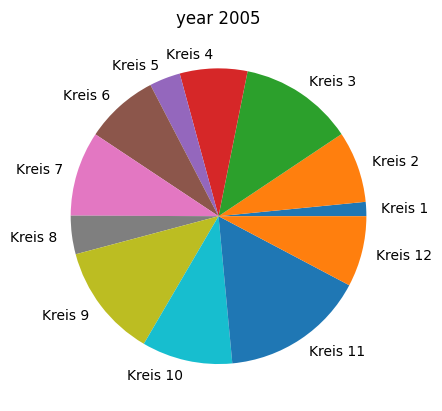

[5618, 28895, 46057, 26999, 12541, 29548, 34323, 15403, 45465, 36341, 58336, 28219]


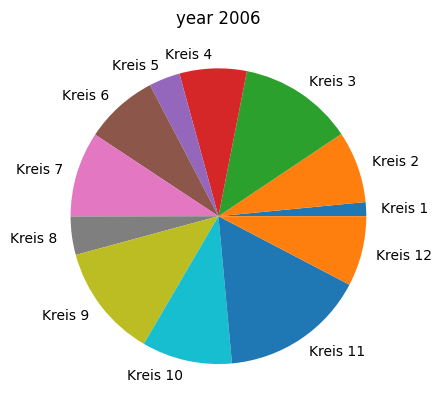

[5651, 28991, 45914, 26794, 12811, 29705, 34567, 15369, 46157, 36545, 60043, 28593]


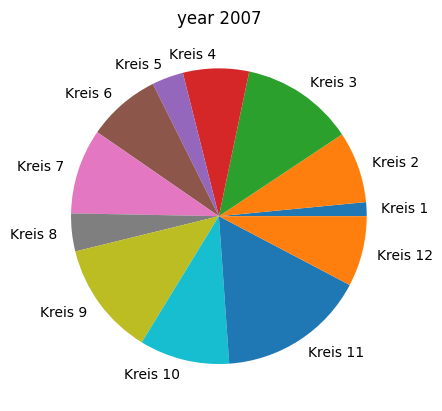

[5626, 29492, 46244, 27110, 12788, 30307, 35008, 15468, 46825, 36597, 63225, 29025]


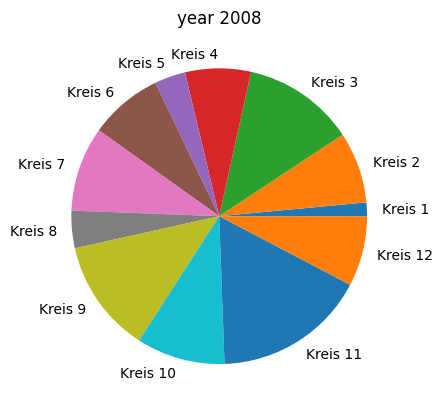

[5527, 29558, 46807, 27409, 12690, 30857, 35332, 15364, 47414, 36713, 64226, 29183]


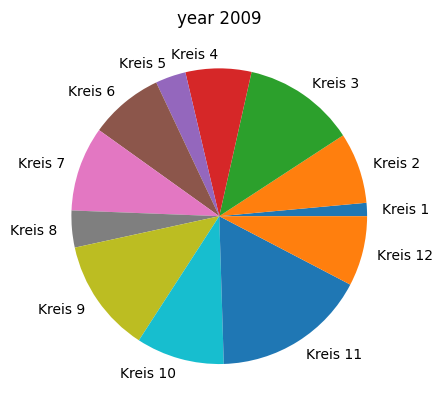

[5553, 29900, 46877, 27331, 12777, 31169, 35393, 15299, 47508, 36911, 64670, 29726]


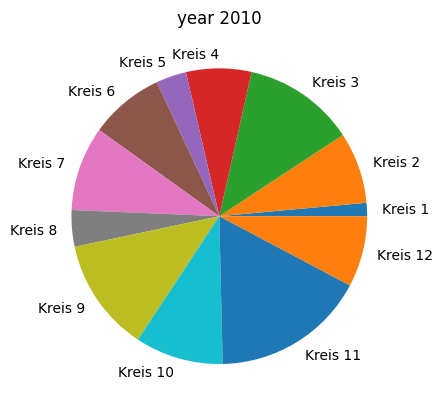

[5550, 29912, 46807, 27439, 12771, 31518, 35599, 15560, 48439, 36906, 66108, 29482]


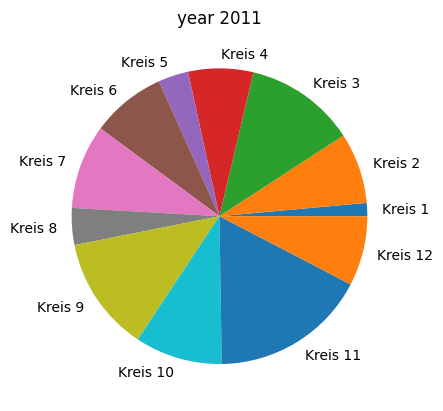

[5551, 30067, 46935, 27470, 12958, 31561, 35590, 15546, 49611, 37189, 67903, 29447]


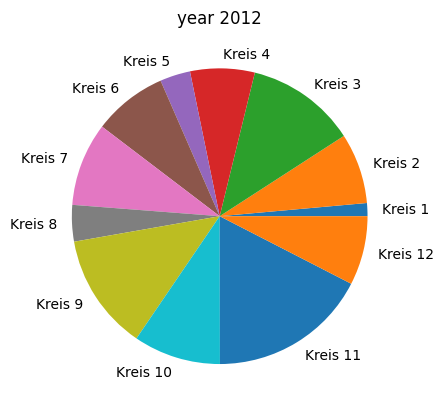

[5599, 30268, 47948, 27766, 13288, 31822, 35745, 15567, 50201, 37370, 69233, 29347]


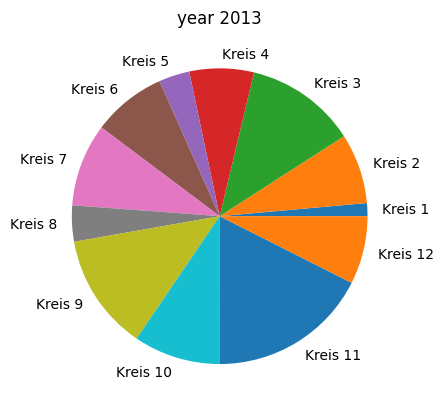

[5558, 30555, 48325, 28112, 13653, 32260, 36208, 15945, 49924, 37432, 70785, 29676]


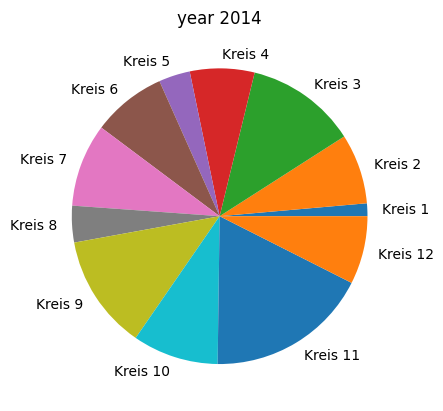

[5603, 31195, 48927, 28644, 14175, 32693, 36625, 16203, 50553, 37568, 72100, 30673]


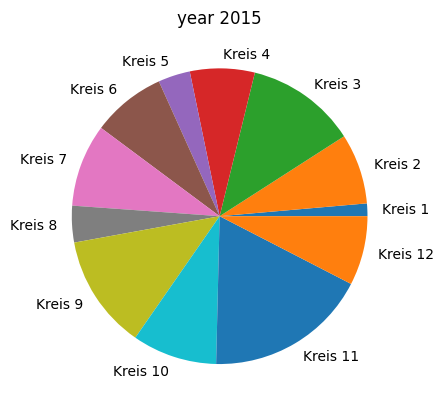

[5595, 31590, 49258, 28631, 15100, 32863, 37022, 16152, 51206, 38209, 72671, 31871]


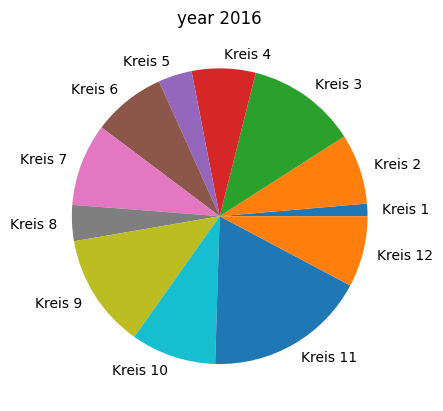

[5650, 32267, 49600, 28639, 15517, 33380, 37159, 16243, 52975, 39697, 73529, 31805]


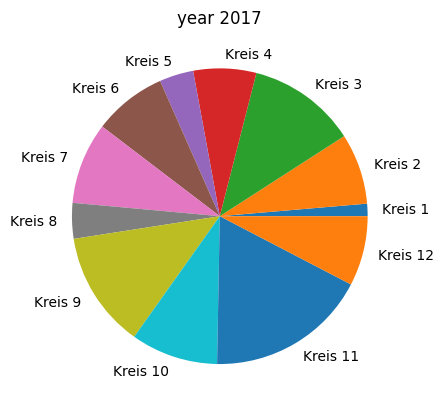

[5685, 33633, 49978, 28653, 15667, 33509, 37458, 16584, 54569, 40241, 74469, 31944]


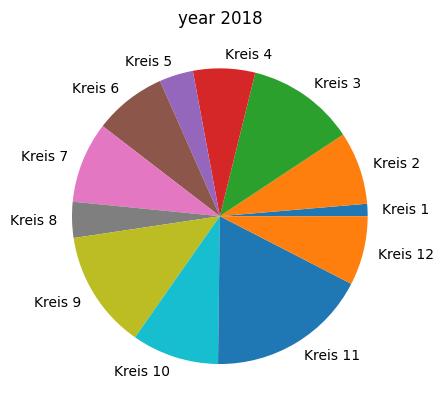

[5749, 34911, 50771, 28737, 15578, 34368, 38220, 16791, 55722, 40423, 75162, 32404]


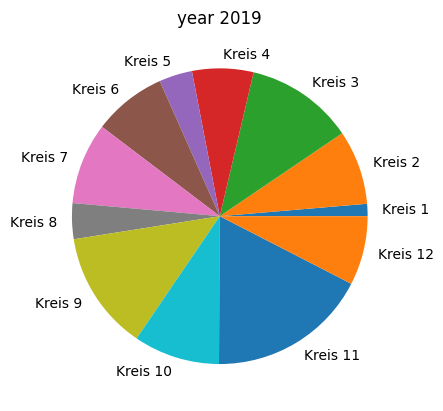

[5750, 35102, 51168, 29358, 15749, 34816, 38615, 17092, 56493, 40768, 75625, 33221]


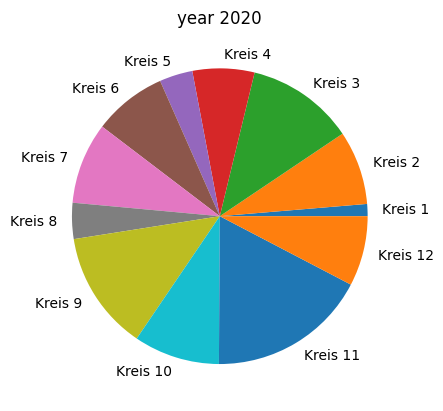

[5811, 35514, 50682, 28938, 15593, 35308, 38619, 17467, 56321, 40962, 76106, 32624]


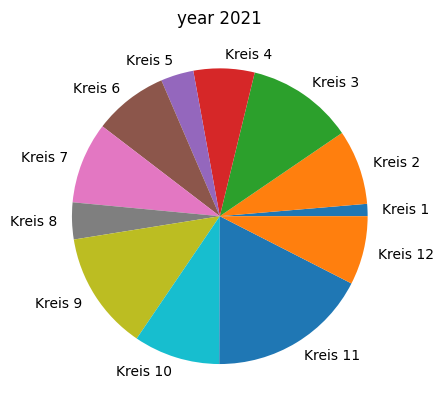

[5813, 36003, 50082, 29011, 15835, 35375, 38663, 17839, 57030, 41008, 76705, 32473]


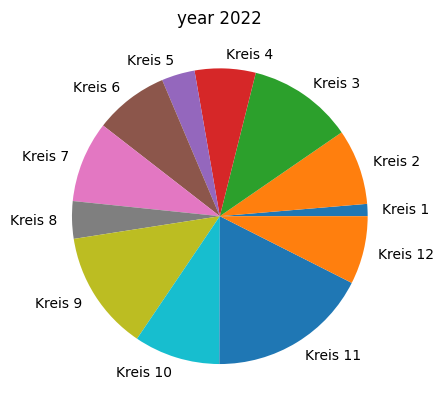

[5859, 37047, 50718, 29740, 15892, 35840, 39207, 17811, 58492, 41457, 77737, 32938]


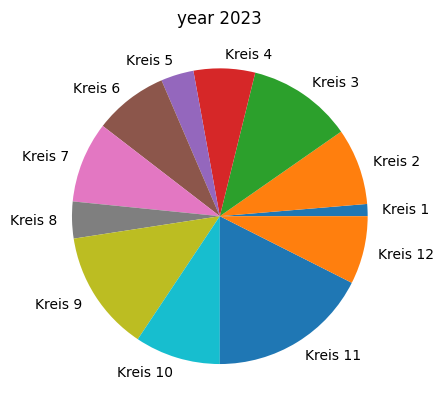

[5872, 37696, 50952, 29892, 15884, 35626, 39658, 17848, 59744, 41372, 78598, 33448]


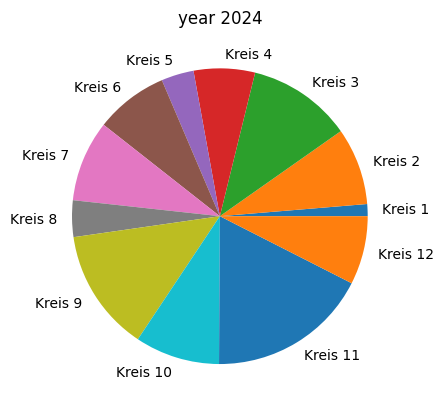

In [43]:
from pop_utils import get_kreis_population

labels = data['KreisLang'].unique().tolist()
labels.pop()
years = np.arange(1998, 2025)

for year in years:
    
    kreis_populations = []
    for i in range(len(labels)):

        day = f'{year}-01-31'

        kreis_populations.append(get_kreis_population(data, day, i+1))

    print(kreis_populations)
    plt.figure()
    plt.pie(kreis_populations, labels = labels)
    plt.title(f"year {year}")
    plt.show()



We see that the proportion of the population in the different districts/kreises remains roughly constant along the years

## Age Distribution in Different Kreises 

In [ ]:
StichtagDatJahr                       1998
StichtagDatMM                            1
StichtagDatMonat                    Januar
StichtagDat                     1998-01-31
SexCd                                    1
SexLang                           männlich
AlterV20ueber80Sort_noDM                 1
AlterV20ueber80Cd_noDM                   1
AlterV20ueber80Kurz_noDM              0-19
HerkunftCd                               1
HerkunftLang                  Schweizer*in
KreisCd                                  1
KreisLang                          Kreis 1
QuarCd                                  11
QuarLang                           Rathaus
DatenstandCd                             V
DatenstandLang              Veröffentlicht
AnzBestWir                             114

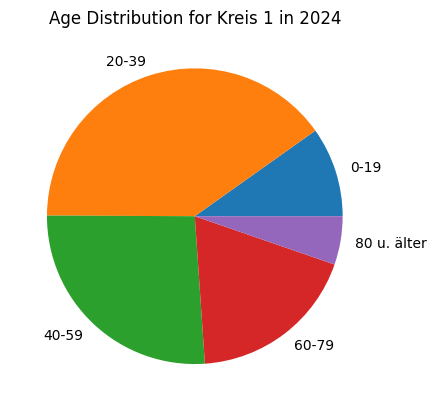

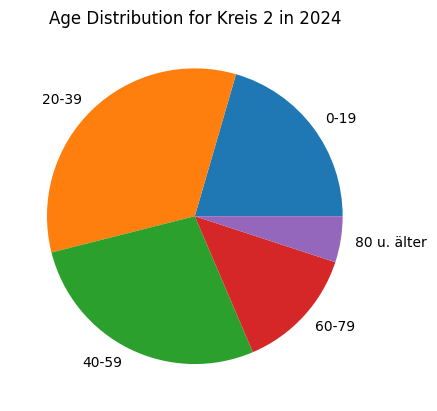

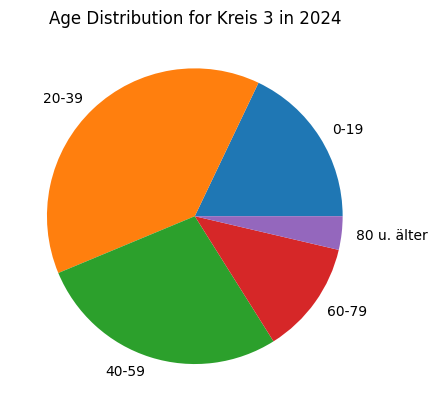

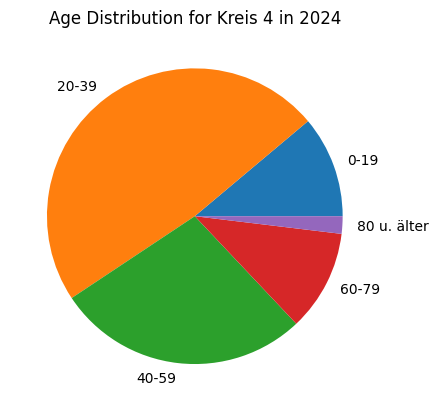

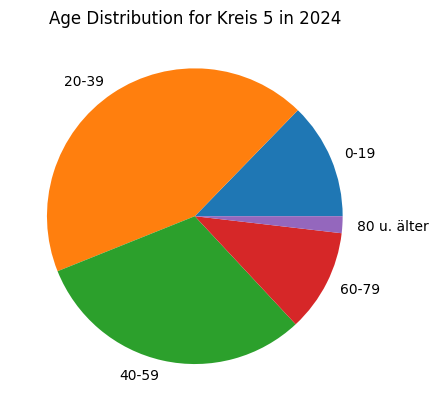

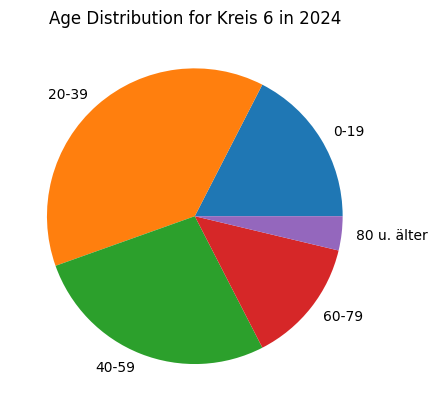

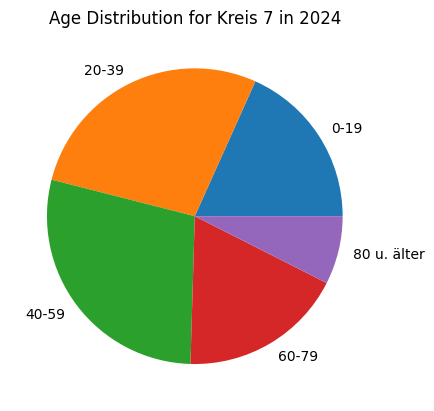

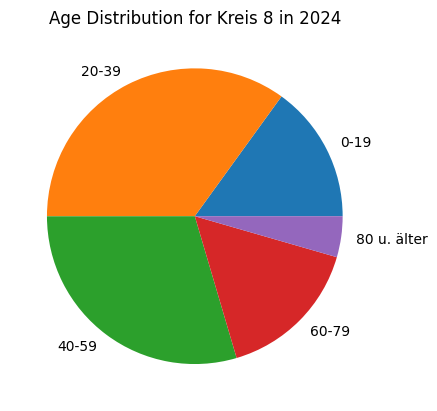

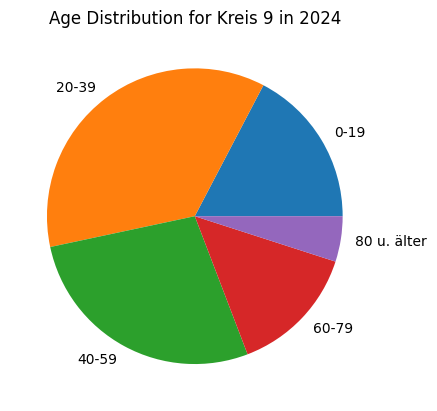

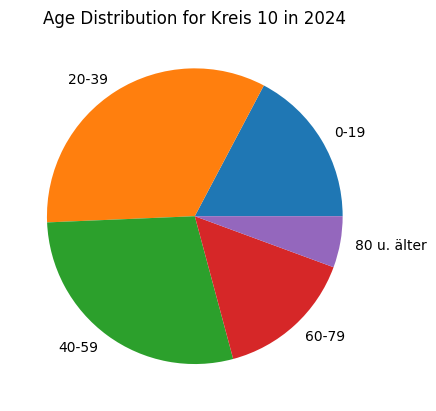

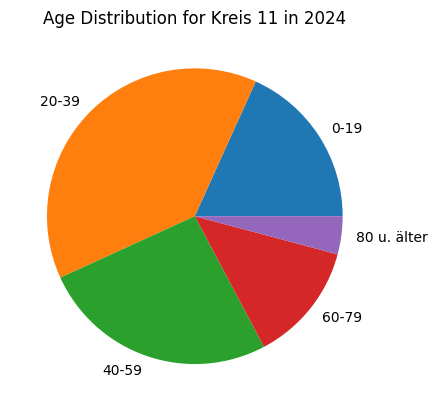

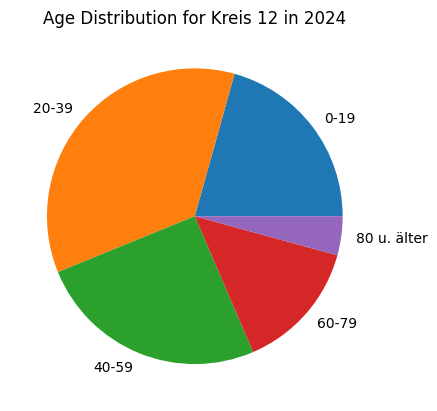

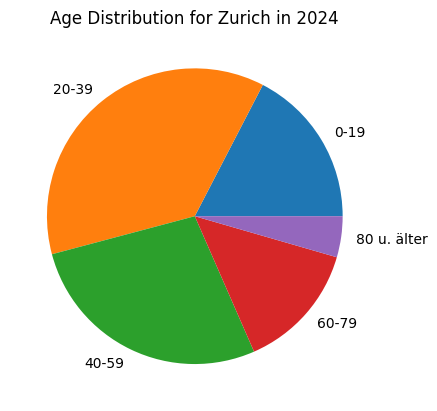

In [49]:
age_labels = data['AlterV20ueber80Kurz_noDM'].unique().tolist()
kreises = data['KreisLang'].unique().tolist()
year = 2024

for kreis_idx in range(len(kreises)-1):
    
    kreis_populations = []
    for i in range(len(age_labels)):

        day = f'{year}-01-31'

        kreis_populations.append(sum(data.loc[(data['StichtagDat']==day) & (data['KreisCd']==kreis_idx+1) & (data['AlterV20ueber80Cd_noDM']==i+1), 'AnzBestWir']))

    plt.figure()
    plt.pie(kreis_populations, labels = age_labels)
    plt.title(f"Age Distribution for {kreises[kreis_idx]} in {year}")
    plt.show()

kreis_populations = []
for i in range(len(age_labels)):

    day = f'{year}-01-31'

    kreis_populations.append(sum(data.loc[(data['StichtagDat']==day) & (data['AlterV20ueber80Cd_noDM']==i+1), 'AnzBestWir']))

plt.figure()
plt.pie(kreis_populations, labels = age_labels)
plt.title(f"Age Distribution for Zurich in {year}")
plt.show()



## Distribution of Men/Women over Kreises

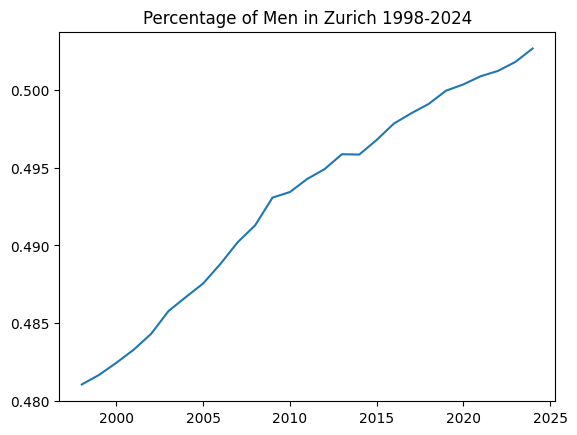

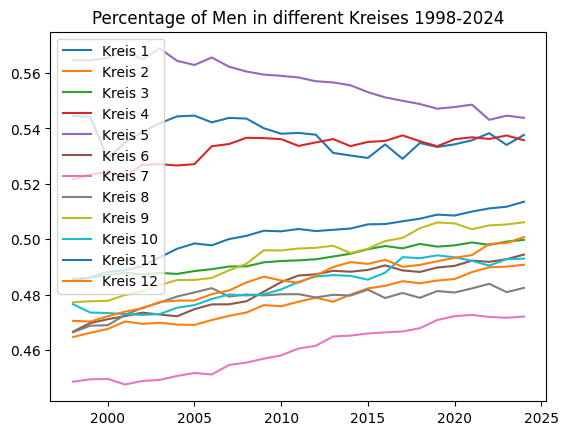

In [68]:
sex_labels = data['SexLang'].unique().tolist()
kreises = data['KreisLang'].unique().tolist()
years = np.arange(1998, 2025)

total_male_percentages = []
kreis_male_percentages = [[] for _ in range(len(kreises)-1)]


for year in years:
    total_populations = []
    for i in range(len(sex_labels)):

        day = f'{year}-01-31'

        total_populations.append(sum(data.loc[(data['StichtagDat']==day) & (data['SexCd']==i+1), 'AnzBestWir']))

    total_male_percentages.append(total_populations[0]/sum(total_populations))

    for kreis_idx in range(len(kreises)-1):
    
        kreis_populations = []
        for j in range(len(sex_labels)):

            day = f'{year}-01-31'

            kreis_populations.append(sum(data.loc[(data['StichtagDat']==day) & (data['KreisCd']==kreis_idx+1) & (data['SexCd']==j+1), 'AnzBestWir']))

        kreis_male_percentages[kreis_idx].append(kreis_populations[0]/sum(kreis_populations))


    '''plt.figure()
    plt.bar(x = nat_labels, height=total_populations)
    plt.title(f"Swiss/Foreigners Distribution for Zurich in {year}")
    plt.show()'''

plt.figure()
plt.plot(years, total_male_percentages)
plt.title("Percentage of Men in Zurich 1998-2024")
plt.show()

plt.figure()
for i in range(len(kreises)-1):

    plt.plot(years, kreis_male_percentages[i], label = f'{kreises[i]}')

plt.legend()
plt.title("Percentage of Men in different Kreises 1998-2024")
plt.show()



## Distribution of Nationalities

In [62]:
print(data['HerkunftLang'].unique())

['Schweizer*in' 'Ausländer*in']


[3958, 1914]


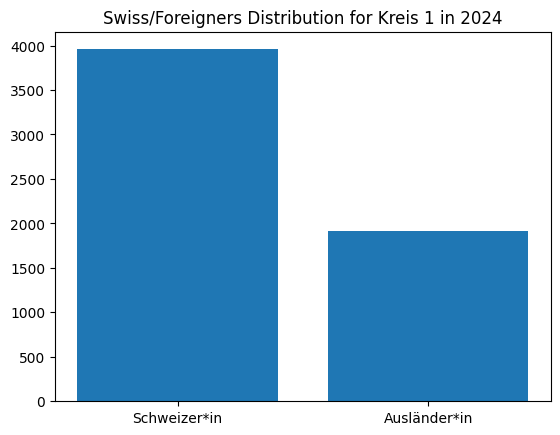

[24755, 12941]


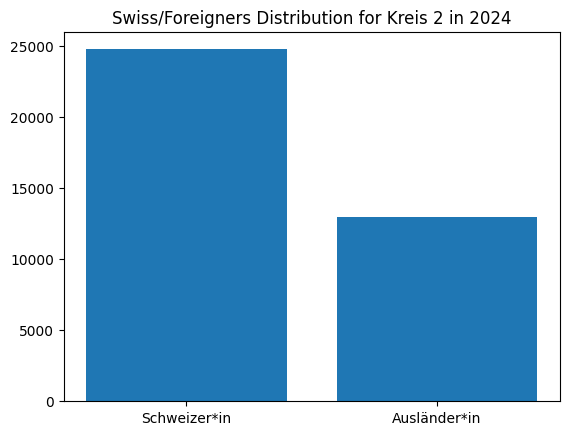

[35221, 15731]


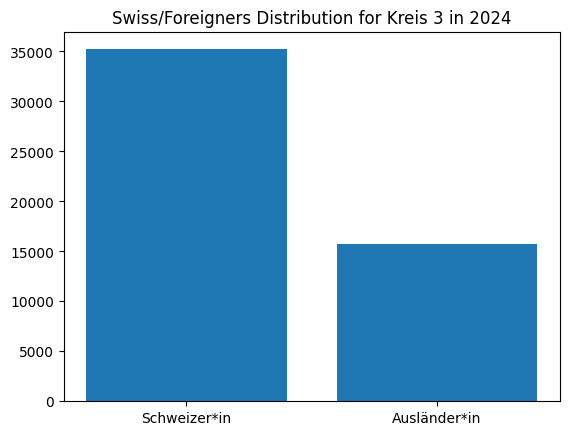

[18757, 11135]


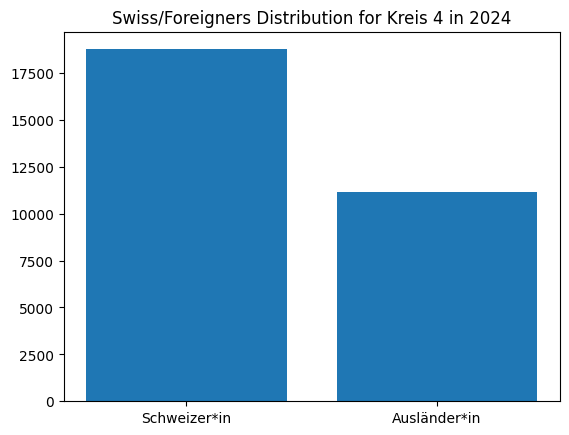

[10774, 5110]


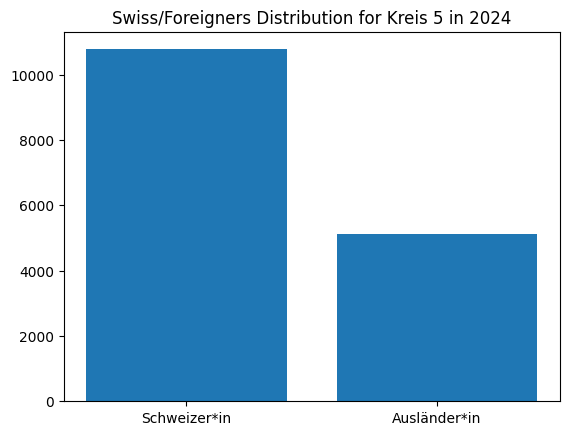

[25058, 10568]


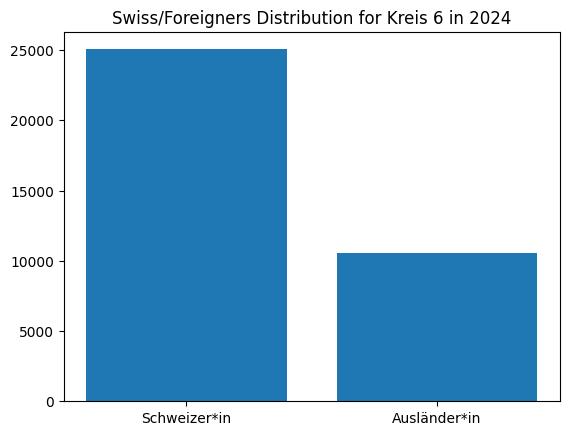

[28076, 11582]


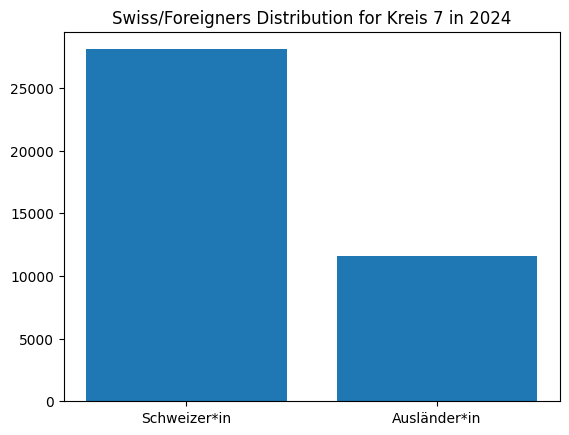

[11102, 6746]


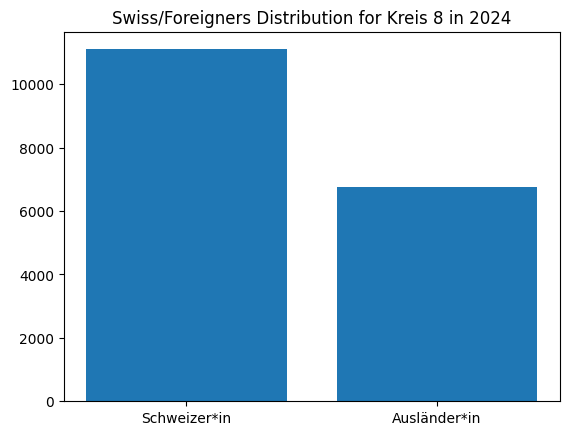

[39427, 20317]


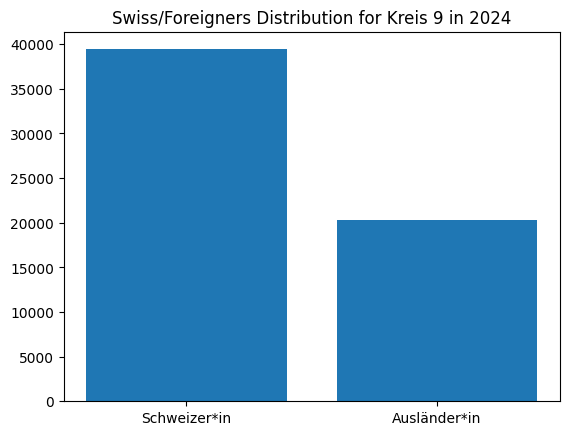

[30345, 11027]


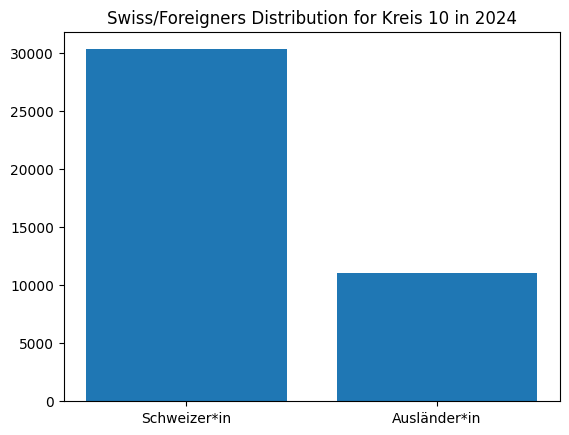

[48277, 30321]


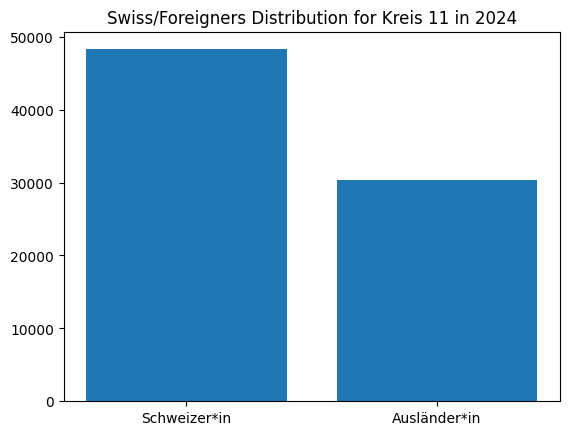

[20787, 12661]


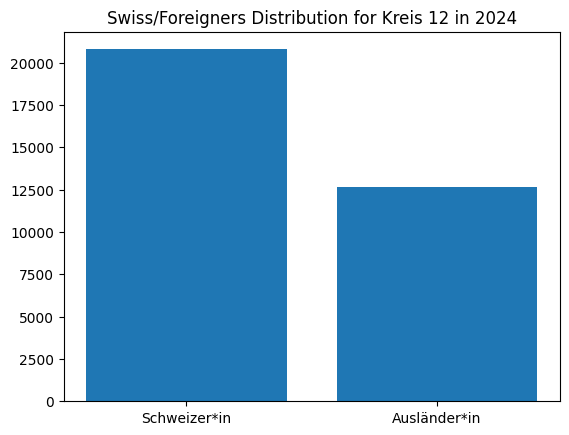

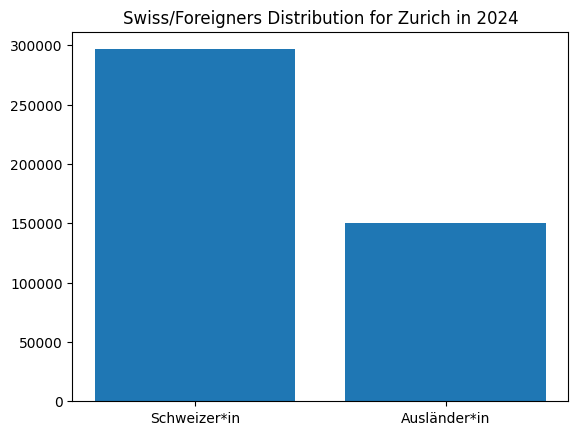

In [63]:
nat_labels = data['HerkunftLang'].unique().tolist()
kreises = data['KreisLang'].unique().tolist()
year = 2024

for kreis_idx in range(len(kreises)-1):
    
    kreis_populations = []
    for i in range(len(nat_labels)):

        day = f'{year}-01-31'

        kreis_populations.append(sum(data.loc[(data['StichtagDat']==day) & (data['KreisCd']==kreis_idx+1) & (data['HerkunftCd']==i+1), 'AnzBestWir']))

    print(kreis_populations)
    plt.figure()
    plt.bar(x = nat_labels, height=kreis_populations)
    plt.title(f"Swiss/Foreigners Distribution for {kreises[kreis_idx]} in {year}")
    plt.show()

total_populations = []
for i in range(len(nat_labels)):

    day = f'{year}-01-31'

    total_populations.append(sum(data.loc[(data['StichtagDat']==day) & (data['HerkunftCd']==i+1), 'AnzBestWir']))

plt.figure()
plt.bar(x = nat_labels, height=total_populations)
plt.title(f"Swiss/Foreigners Distribution for Zurich in {year}")
plt.show()

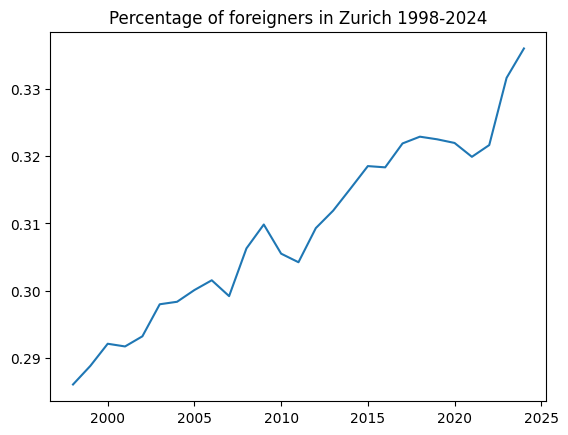

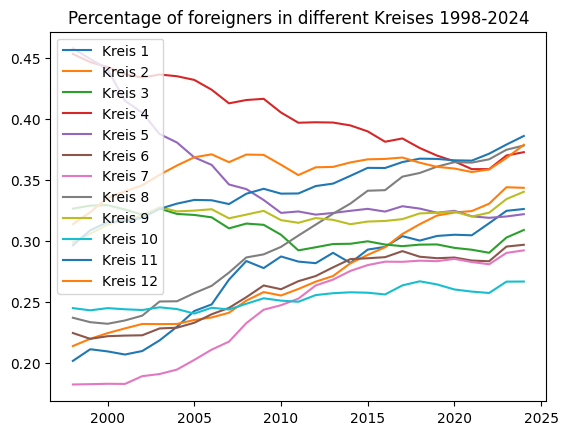

In [67]:
#similar plot but checking how the distribution changes over the years in Zurich

nat_labels = data['HerkunftLang'].unique().tolist()
kreises = data['KreisLang'].unique().tolist()
years = np.arange(1998, 2025)

total_foreigners_percentages = []
kreis_foreigners_percentages = [[] for _ in range(len(kreises)-1)]


for year in years:
    total_populations = []
    for i in range(len(nat_labels)):

        day = f'{year}-01-31'

        total_populations.append(sum(data.loc[(data['StichtagDat']==day) & (data['HerkunftCd']==i+1), 'AnzBestWir']))

    total_foreigners_percentages.append(total_populations[1]/sum(total_populations))

    for kreis_idx in range(len(kreises)-1):
    
        kreis_populations = []
        for j in range(len(nat_labels)):

            day = f'{year}-01-31'

            kreis_populations.append(sum(data.loc[(data['StichtagDat']==day) & (data['KreisCd']==kreis_idx+1) & (data['HerkunftCd']==j+1), 'AnzBestWir']))

        kreis_foreigners_percentages[kreis_idx].append(kreis_populations[1]/sum(kreis_populations))


    '''plt.figure()
    plt.bar(x = nat_labels, height=total_populations)
    plt.title(f"Swiss/Foreigners Distribution for Zurich in {year}")
    plt.show()'''

plt.figure()
plt.plot(years, total_foreigners_percentages)
plt.title("Percentage of foreigners in Zurich 1998-2024")
plt.show()

plt.figure()
for i in range(len(kreises)-1):

    plt.plot(years, kreis_foreigners_percentages[i], label = f'{kreises[i]}')

plt.legend()
plt.title("Percentage of foreigners in different Kreises 1998-2024")
plt.show()